# Aim 
> merge the datasets. One dataset with lyrics and the other with similar songs in pairs. I will merge based on title and artist. I aim to extract any pairs that have lyrics for both songs. 

If we want to further enlarge the dataset, we can accept more songs from the 5 M datasets. In addition, we can include more pairs. i.e. each song has multiples of similar songs, we have only chosen a single similar song. 


In [61]:
import pandas as pd 
import seaborn as sns 

In [47]:
song_pairs = pd.read_csv("full_songs_pairs.csv")

In [48]:
song_pairs.head()

,track1_id,track2_id,score,track1_title,track1_artist_name,track1_year,track2_title,track2_artist_name,track2_year
0,TRCCCYE12903CFF0E9,TRZQUEN12903CBFFBB,0.400000,Brandenburger,The Nice,1991,Pirates,Emerson_ Lake & Palmer,1977.0
1,TRCCCPM12903CBEEE5,TRWVNWV12903CBEEE7,0.523805,A Little More Love,T-Connection,2002,Party Night,T-Connection,2002.0
2,TRCCCFH12903CEBC70,TRTVJGV128F424A147,0.600000,Baby Please Come Home,Memphis Slim,0,Blue Shadows,Lowell Fulson,1960.0
3,TRCCCJT128F429FFF6,TRYVKKD12903CEB9E2,1.000000,Bonjour ca va,Middle Of The Road,1999,Everybody Loves a Winner,Middle Of The Road,1992.0
4,TRCCCBJ128F4286E6F,TRMMPCY128F4253A20,0.990676,The Sun Road,Terry Bozzio,0,Bone And Flesh,Tony Levin,2000.0


In [49]:
df = pd.read_csv("data10k.csv")

In [50]:
df.shape, song_pairs.shape

((59305, 9), (584897, 9))

In [51]:
merge1 = song_pairs.merge(df, how = 'inner', left_on = ["track1_title", "track1_artist_name"],  right_on = ["title", "artist"])

In [52]:
merge1 = merge1[['track1_title', 'track1_artist_name', 'track2_title', 'track2_artist_name', 'lyrics', 'score']]

In [53]:
merge2 = merge1.merge(df, how = 'inner', left_on = ["track2_title", "track2_artist_name"],  right_on = ["title", "artist"])

In [54]:
merge2 = merge2[['track1_title', 'track1_artist_name', 'track2_title', 'track2_artist_name', 'lyrics_x', "lyrics_y", "score" ]]

In [55]:
merge2 = merge2.drop_duplicates(subset = ['track1_title', 'track1_artist_name'])

In [56]:
merge2 = merge2.drop_duplicates(subset = ['track2_title', 'track2_artist_name'])

In [57]:
merge2.shape

(1494, 7)

In [58]:
merge_clean = merge2.query('track1_title != track2_title') # to remove duplicates 

In [59]:
merge_clean.shape

(1490, 7)

In [60]:
merge_clean.head()

,track1_title,track1_artist_name,track2_title,track2_artist_name,lyrics_x,lyrics_y,score
0,We Will Rock You,Queen,Walk This Way,Aerosmith,"\nBuddy, you're a boy, make a big noise\nPlayi...","\n\n\nBackstroking lover, always hiding 'neath...",0.100000
8,One Love,Nas,Bring Da Ruckus,Wu-Tang Clan,"\n\n\nWhat up, kid? I know shit is rough doin'...",\n“Shaolin shadowboxing and the Wu-Tang sword ...,0.100000
12,Love Me,Justin Bieber,Common Denominator,Justin Bieber,\nMy friends say I'm a fool to think that you'...,\nJust a fraction of your love fills the air\n...,0.845078
14,Conteo,Don Omar,Virtual Diva,Don Omar,"\n\n\nYou know, haha\nKing of Kings\nIt is wha...","\n\n\n\n\nD-D-D-, D.O.!\nDiesel!\n‎iDon!\n\n\n...",0.600000
16,Breakthru,Queen,The Great Pretender,Freddie Mercury,"\nWhen love breaks up, (Breaks up)\nWhen the d...","\nOh yes, I'm the great pretender (Woo-woo)\nP...",0.200000


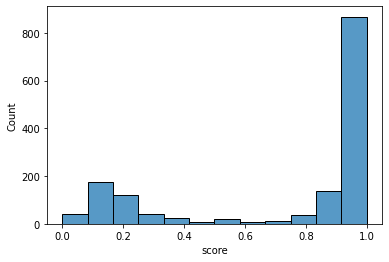

In [64]:
sns.histplot(data = merge_clean, x = 'score');

In [66]:
merge_clean.query('score == 1')

,track1_title,track1_artist_name,track2_title,track2_artist_name,lyrics_x,lyrics_y,score
19,I Got You Babe,Sonny & Cher,The Beat Goes On,Sonny & Cher,\nThey say we're young and we don't know\nWe w...,\nThe beat goes on\nThe beat goes on\n\n\nDrum...,1.0
24,The Purple People Eater,Sheb Wooley,Witch Doctor,David Seville,"AAAAAHHHH!!!!!!!!!\n\nWell, I saw the thing co...",I told the witch doctor I was in love with you...,1.0
34,Break Stuff,Limp Bizkit,Nookie,Limp Bizkit,\nIt's just one of those days when you don't w...,"\nCheck, one, one, two\n\n\nI came into this w...",1.0
60,I Love Your Smile,Shanice,Sensitivity,Ralph Tresvant,\nSitting in my class\nJust drifting away\nSta...,"\nListen baby, don't even waste your tears on ...",1.0
67,Love Come Down,"Evelyn ""Champagne"" King",Automatic,The Pointer Sisters,\nLove come down\nAll the way down\n\n\nNo sle...,\nLook what you're doing to me\nI'm utterly at...,1.0
...,...,...,...,...,...,...,...
3422,Reminiscing,Little River Band,Lady,Little River Band,"\nFriday night, it was late\nI was walking you...","Look around you, look up here\nTake time to ma...",1.0
3424,Peg,Steely Dan,Deacon Blues,Steely Dan,\n\n\nI've seen your picture\nYour name in lig...,\nThis is the day\nOf the expanding man\nThat ...,1.0
3425,Crazier,Taylor Swift,Jump Then Fall,Taylor Swift,"\nI'd never gone with the wind, just let it fl...",\nI like the way you sound in the morning\nWe'...,1.0
3432,Conga,Miami Sound Machine,Footloose,Kenny Loggins,"\nCome on, shake your body, baby, do the conga...",\nBeen working so hard\nI'm punching my card\n...,1.0


There are many entries with a score of 1. They don't seem like duplicates. But that's strange. 

In [67]:
merge_clean.to_csv('song_pairs_lyrics.csv', index = False)